<a href="https://colab.research.google.com/github/Kimhanse0307/task/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=";")

In [11]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
data = wine[['alcohol', 'pH']].to_numpy()
target = wine['quality'].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

스케일링

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

로지스틱 회귀분석

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.5051046452271567
0.49489795918367346


In [31]:
y_pred = lr.predict(train_scaled)

print("정확도(Accuracy):", accuracy_score(train_target, y_pred))
print("\n분류 보고서:\n", classification_report(train_target, y_pred))

정확도(Accuracy): 0.5051046452271567

분류 보고서:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00       138
           5       0.51      0.51      0.51      1166
           6       0.50      0.72      0.59      1766
           7       0.49      0.17      0.25       688
           8       0.00      0.00      0.00       140
           9       0.00      0.00      0.00         5

    accuracy                           0.51      3918
   macro avg       0.21      0.20      0.19      3918
weighted avg       0.46      0.51      0.46      3918



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


기울기, 절편

In [33]:
print(lr.coef_, lr.intercept_)

[[-0.27395802 -0.22476674]
 [-0.60894453 -0.12424733]
 [-1.08246302 -0.15659381]
 [-0.20097484 -0.10216822]
 [ 0.47178103  0.03899996]
 [ 0.68747413  0.03742827]
 [ 1.00708524  0.53134787]] [-2.0506119   0.12786681  2.05342803  2.72438168  1.51708767 -0.24717017
 -4.12498213]


결정나무

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7730985196528841
0.4969387755102041


In [22]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.5122511485451761
0.49081632653061225


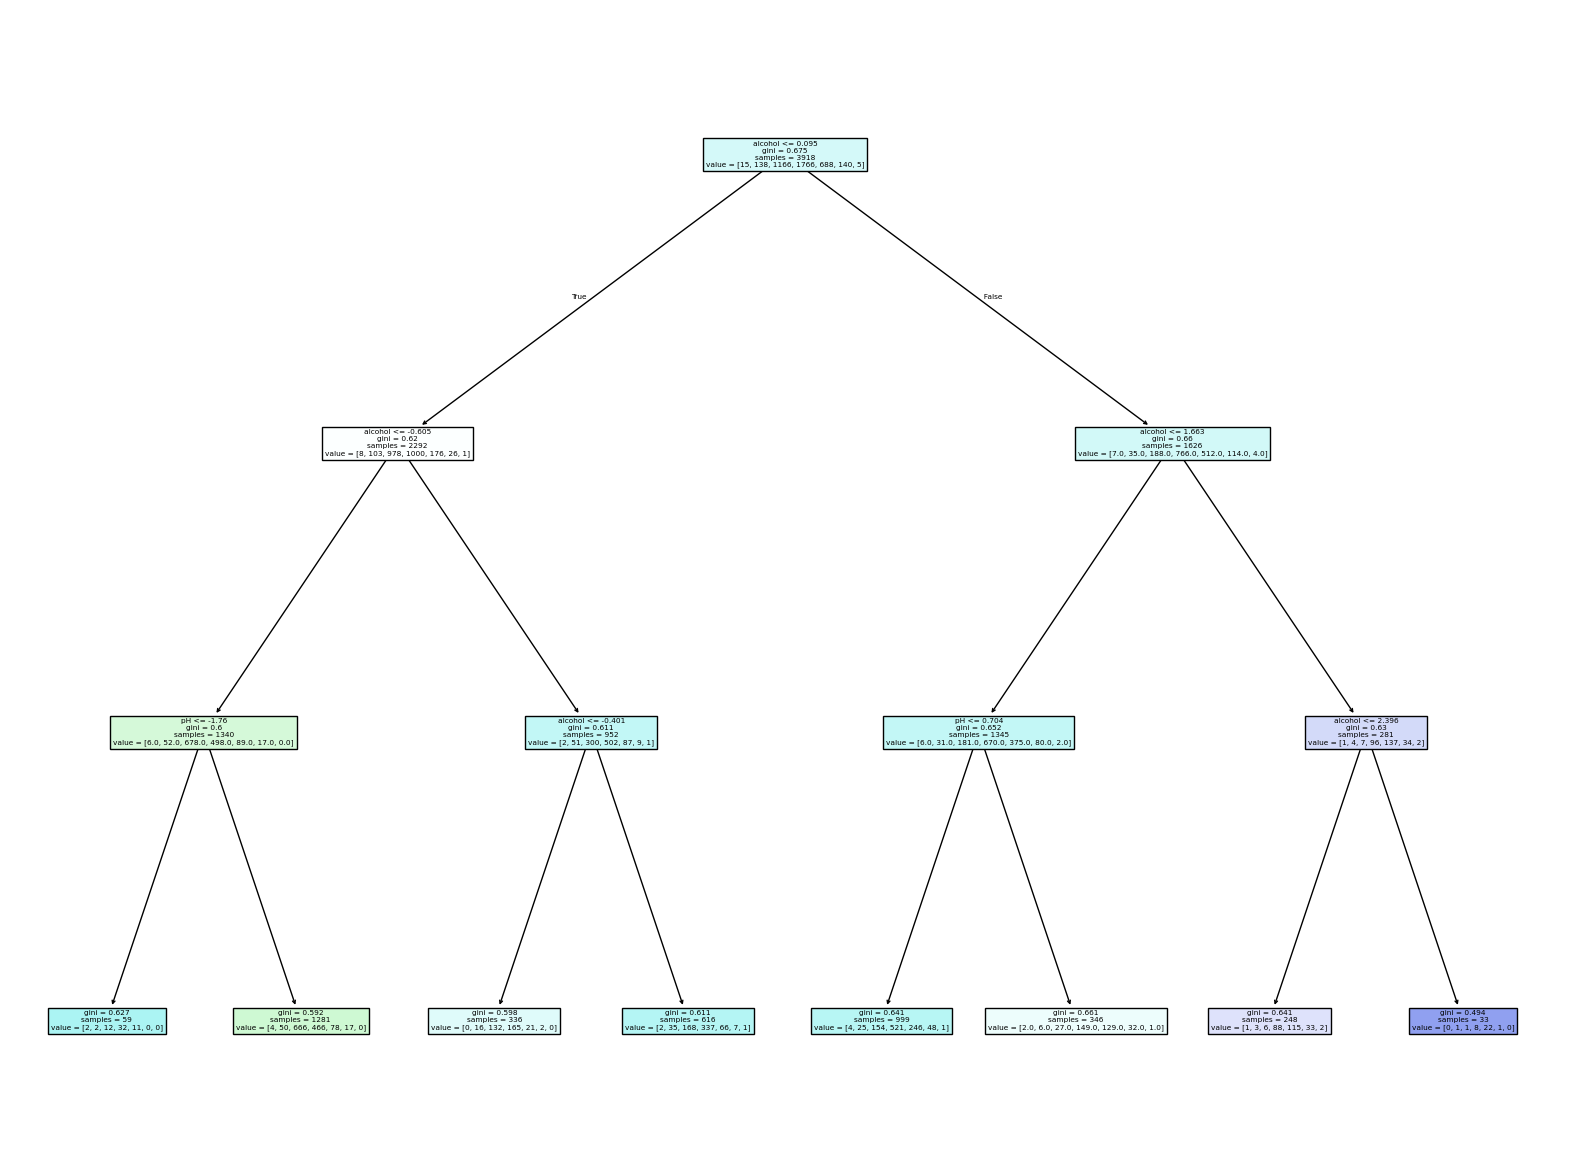

In [39]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'pH'])
plt.show()

랜덤포레스트

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,      # 트리 개수
    max_depth=None,        # 트리 깊이 제한 없음
    random_state=42
)

# 5. 학습
rf_model.fit(X_train, y_train)

# 6. 예측
y_pred = rf_model.predict(X_test)

In [27]:
# 7. 성능 평가
from sklearn.metrics import accuracy_score, classification_report
print("정확도(Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

정확도(Accuracy): 0.689795918367347

분류 보고서:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.60      0.24      0.34        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.59      0.46      0.50       980
weighted avg       0.69      0.69      0.68       980



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


knn

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# 2. 특징(X), 타겟(y) 분리
X = wine.drop('quality', axis=1)

# 3. 학습용 / 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. KNN은 거리 기반 알고리즘이므로 스케일링 필수
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. KNN 모델 생성 (k=5 기본값)
knn = KNeighborsClassifier(n_neighbors=5)

# 6. 학습
knn.fit(X_train_scaled, y_train)

# 7. 예측
y_pred = knn.predict(X_test_scaled)

# 8. 성능 평가
print("정확도(Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

정확도(Accuracy): 0.7571428571428571

분류 보고서:
               precision    recall  f1-score   support

           0       0.66      0.58      0.61       328
           1       0.80      0.85      0.82       652

    accuracy                           0.76       980
   macro avg       0.73      0.71      0.72       980
weighted avg       0.75      0.76      0.75       980

